In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.sample(5)

id   Podcast_Name Episode_Title  Episode_Length_minutes  \
675222  675222      Tune Time    Episode 91                   38.77   
382000  382000  Home & Living    Episode 43                   28.69   
269135  269135    World Watch     Episode 7                   91.18   
542338  542338    Gadget Geek    Episode 35                  118.15   
459803  459803     Laugh Line    Episode 23                  109.92   

             Genre  Host_Popularity_percentage Publication_Day  \
675222       Music                       79.24          Monday   
382000   Lifestyle                       79.11         Tuesday   
269135        News                       92.46        Thursday   
542338  Technology                       36.40          Friday   
459803      Comedy                       97.07        Thursday   

       Publication_Time  Guest_Popularity_percentage  Number_of_Ads  \
675222        Afternoon                          NaN            0.0   
382000          Evening                        53.63            0.0   
269135          Morning                        17.20            2.0   
542338            Night                        52.40            0.0   
459803            Night                        84.80            2.0   

       Episode_Sentiment  Listening_Time_minutes  
675222          Negative                31.92702  
382000           Neutral                25.57139  
269135          Positive                80.96057  
542338          Positive                98.06790  
459803          Negative                89.27869

In [2]:
# clean data
def clean(dataframe):
    dataframe.drop('id', axis=1, inplace=True)
    dataframe.dropna(axis=0, how='any', inplace=True)
    dataframe.drop(dataframe[dataframe['Number_of_Ads']>10].index, inplace=True)
    dataframe.drop(dataframe[dataframe['Episode_Length_minutes']>250].index, inplace=True)
    dataframe['Episode_Title'] = dataframe['Episode_Title'].map(lambda et: int(et.split()[1]))
    dataframe['Episode_Sentiment'] = dataframe['Episode_Sentiment'].map({'Negative': -1, 'Neutral': 0, 'Positive': +1})
    dataframe['Number_of_Ads'] = dataframe['Number_of_Ads'].astype(int)

    return dataframe

data_train = clean(data_train)
data_test = clean(data_test)
data_train.sample(5)

Podcast_Name  Episode_Title  Episode_Length_minutes       Genre  \
271205   Money Matters             34                   44.52    Business   
370718       Tune Time             71                   55.22       Music   
313973     Sound Waves             63                   23.30       Music   
334368  Study Sessions              5                   48.70   Education   
616287  Digital Digest             85                  104.57  Technology   

        Host_Popularity_percentage Publication_Day Publication_Time  \
271205                       79.53          Monday        Afternoon   
370718                       31.15          Monday            Night   
313973                       62.82          Monday          Morning   
334368                       29.60          Friday          Evening   
616287                       96.70          Sunday        Afternoon   

        Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  \
271205                        38.08              0                 -1   
370718                        47.00              0                 -1   
313973                        59.97              2                 -1   
334368                        96.86              1                  0   
616287                        45.35              1                 -1   

        Listening_Time_minutes  
271205                27.95031  
370718                30.01056  
313973                18.27299  
334368                43.57176  
616287                82.09256

In [3]:
# any duplicate rows in the data sets?
for df in [data_train, data_test]:
    n_orig = len(df)
    df.drop_duplicates(inplace=True)
    print(f"{n_orig - len(df)} duplicate items dropped.")

0 duplicate items dropped.
0 duplicate items dropped.


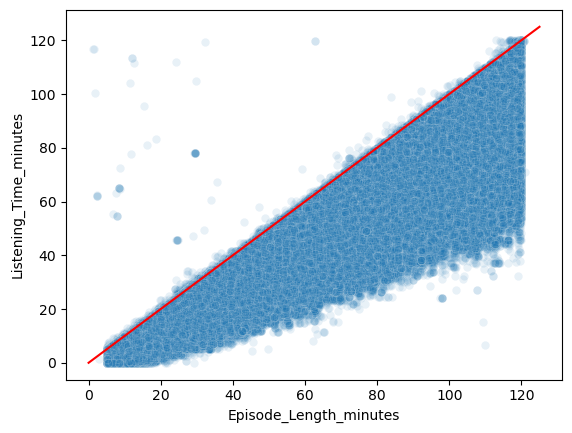

In [4]:
# note the data points with listening >> episode length
sc = sns.scatterplot(data=data_train, x='Episode_Length_minutes', y='Listening_Time_minutes', alpha=0.1)
sc.plot([0, 125], [0, 125], 'r')

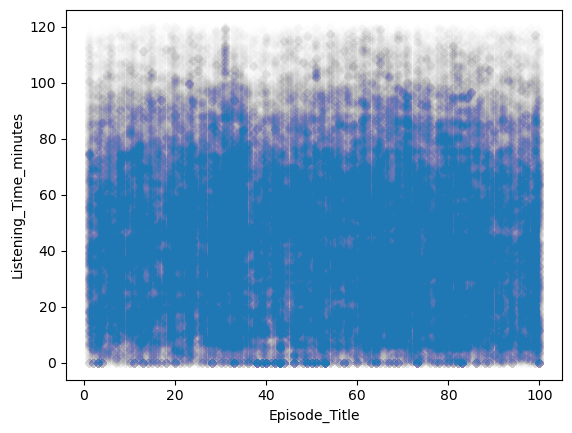

In [5]:
sc = sns.scatterplot(data=data_train, x='Episode_Title', y='Listening_Time_minutes', alpha=0.005)

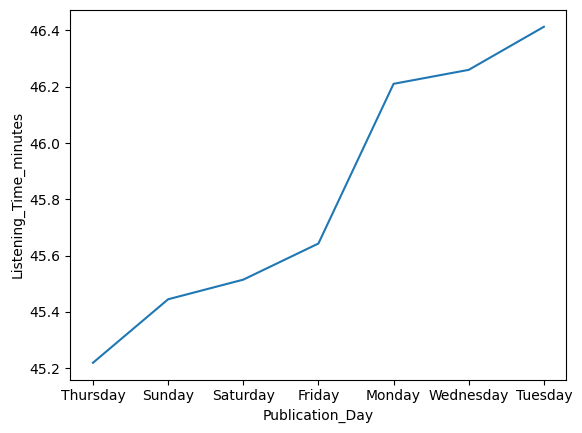

In [6]:
# mean listening time per publ. day / publ. time ==>> TARGET ENCODING
pub_day_mean = data_train[['Listening_Time_minutes', 'Publication_Day']].groupby(['Publication_Day']).mean()
pub_day_mean.sort_values(by='Listening_Time_minutes', inplace=True)
lp = sns.lineplot(data=pub_day_mean, x='Publication_Day', y='Listening_Time_minutes')

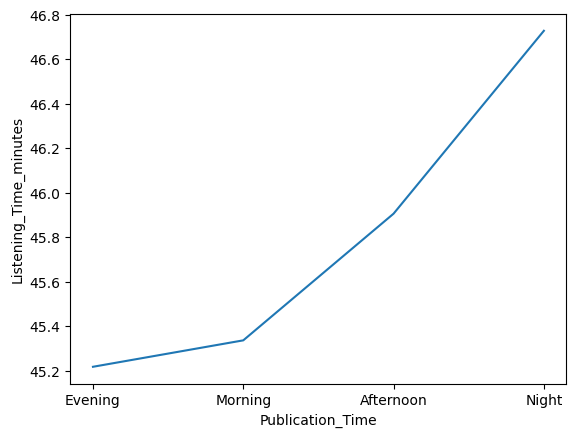

In [7]:
pub_time_mean = data_train[['Listening_Time_minutes', 'Publication_Time']].groupby(['Publication_Time']).mean()
pub_time_mean.sort_values(by='Listening_Time_minutes', inplace=True)
lp = sns.lineplot(data=pub_time_mean, x='Publication_Time', y='Listening_Time_minutes')

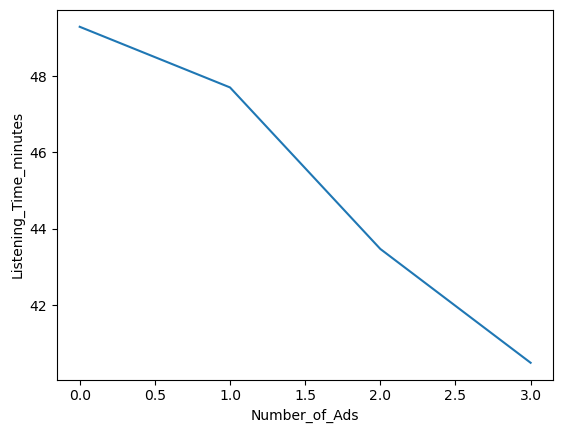

In [8]:
# mean listening time per number of ads
ad_count_mean = data_train[['Listening_Time_minutes', 'Number_of_Ads']].groupby(['Number_of_Ads']).mean()
ad_count_mean.sort_values(by='Listening_Time_minutes', inplace=True)
lp = sns.lineplot(data=ad_count_mean, x='Number_of_Ads', y='Listening_Time_minutes')

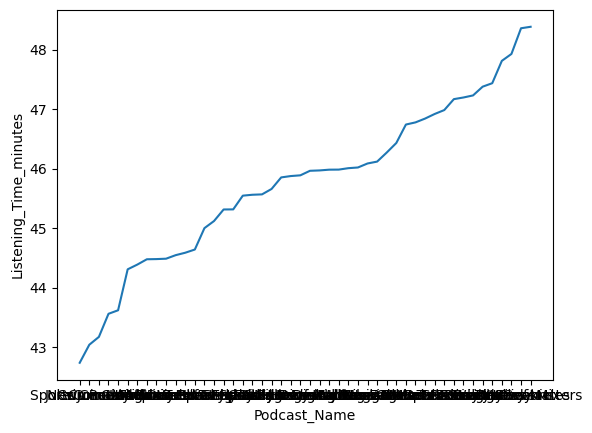

In [9]:
col = 'Podcast_Name'
col_mean = data_train[['Listening_Time_minutes', col]].groupby([col]).mean()
col_mean.sort_values(by='Listening_Time_minutes', inplace=True)
lp = sns.lineplot(data=col_mean, x=col, y='Listening_Time_minutes')

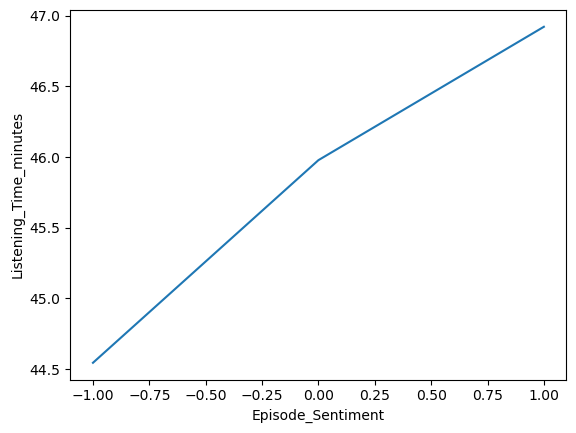

In [10]:
col = 'Episode_Sentiment'
col_mean = data_train[['Listening_Time_minutes', col]].groupby([col]).mean()
col_mean.sort_values(by='Listening_Time_minutes', inplace=True)
lp = sns.lineplot(data=col_mean, x=col, y='Listening_Time_minutes')

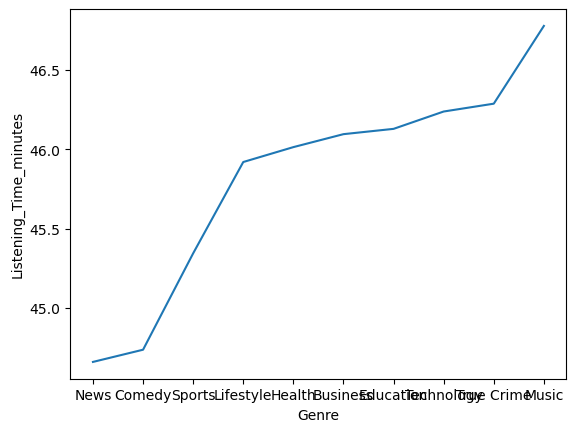

In [11]:
col = 'Genre'
col_mean = data_train[['Listening_Time_minutes', col]].groupby([col]).mean()
col_mean.sort_values(by='Listening_Time_minutes', inplace=True)
lp = sns.lineplot(data=col_mean, x=col, y='Listening_Time_minutes')

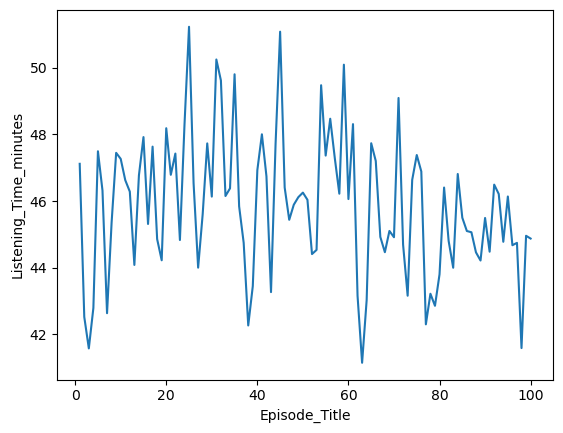

In [12]:
col = 'Episode_Title'
col_mean = data_train[['Listening_Time_minutes', col]].groupby([col]).mean()
col_mean.sort_values(by='Listening_Time_minutes', inplace=True)
lp = sns.lineplot(data=col_mean, x=col, y='Listening_Time_minutes')

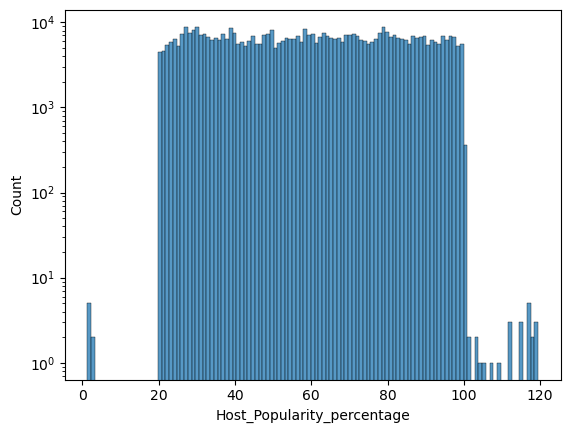

In [13]:
sc = sns.histplot(data=data_train, x='Host_Popularity_percentage')
sc.set_yscale('log')

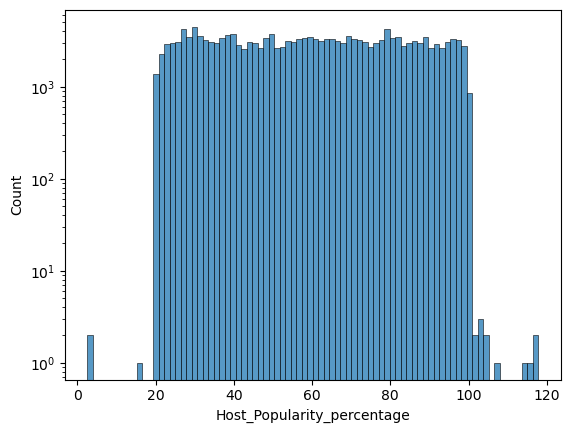

In [14]:
sc = sns.histplot(data=data_test, x='Host_Popularity_percentage')
sc.set_yscale('log')

In [ ]:
sc = sns.histplot(data=data_train, x='Guest_Popularity_percentage')
sc.set_yscale('log')

In [ ]:
sc = sns.histplot(data=data_test, x='Guest_Popularity_percentage')
sc.set_yscale('log')

In [ ]:
# how to replace the outliers with median, without taking the outliers into account
col = 'Host_Popularity_percentage'
valid_median = data_train[col][(data_train[col]>=20) & (data_train[col]<=100)].median()
data_train.loc[data_train[(data_train[col]<20) | (data_train[col]>100)].index, col] = valid_median

sc = sns.histplot(data=data_train, x=col)
sc.set_yscale('log')